<a href="https://colab.research.google.com/github/ddenebb/hipotesis_testing/blob/main/Tasca_M5_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Testing exercises.
#- Exercise 1

Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 5/Data/Lligues europees UEFA.csv"
df = pd.read_csv(path,encoding="ISO-8859-1",delimiter=";", header=0)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


This dataframe contains information about  ranking UEFA football teams, including their squad name, country, league rank, number of matches played, wins, draws, losses, goals scored, goals against, goal difference, points, points per game, expected goals, expected goals against, expected goal difference, expected goal difference per 90 minutes, last five matches, attendance, top team scorer and goalkeeper.
- Rk: ranking UEFA
- Squad: squad name
- Country: country
- LgRk: league rank
- MP: number of matches played
- W: wins
- D: draws
- L: losses
- GF: goals scored
- GA: goals against
- GD: goal difference
- Pts: points
- Pts/G: points per game
- xG: expected goals
- xGA: expected goals against
- xGD: expected goal difference
- xGD/90: expected goal difference per 90 minutes
- Last 5: last five matches performance (W=win, D=draw, L=loose)
- Attendance: avg attendance, number of people per match
- Top Team Scorer: player name - nember of goals
- Goalkeeper: player name

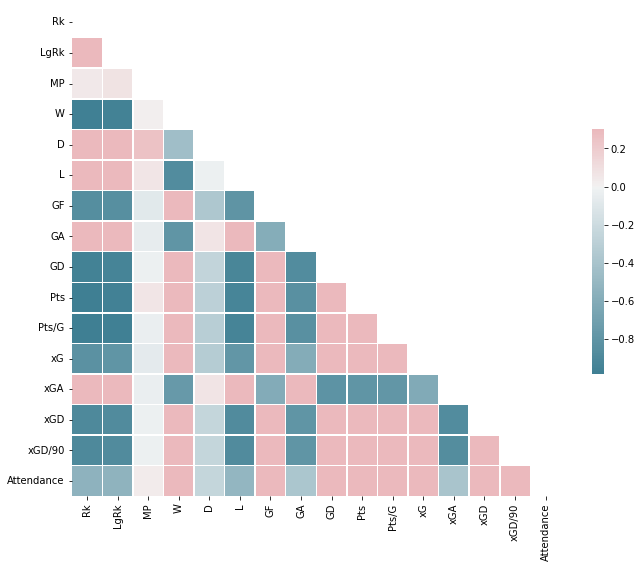

In [75]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [2]:
df['Rk']

0      1
1      2
2      3
3      4
4      5
      ..
93    94
94    95
95    96
96    97
97    98
Name: Rk, Length: 98, dtype: int64

For example, Points are normally distributed

In [48]:
from scipy.stats import shapiro

null_hypothesis = "Points are normally distributed"
alternative_hypothesis = "Points are NOT normally distributed"

# Get the 'Pts' attribute from the dataframe
pts = df['Pts']

# Perform the Shapiro-Wilk test
stat, p = shapiro(pts)
print(stat)
print(p)

# Set alpha
alpha = 0.05

# Compare p_value with alpha
if p < alpha:
    print("Reject the null hypothesis.")
    print(null_hypothesis)
else:
    print("Fail to reject the null hypothesis.")
    print(alternative_hypothesis)

0.9720419645309448
0.03465989604592323
Reject the null hypothesis.
Points are normally distributed


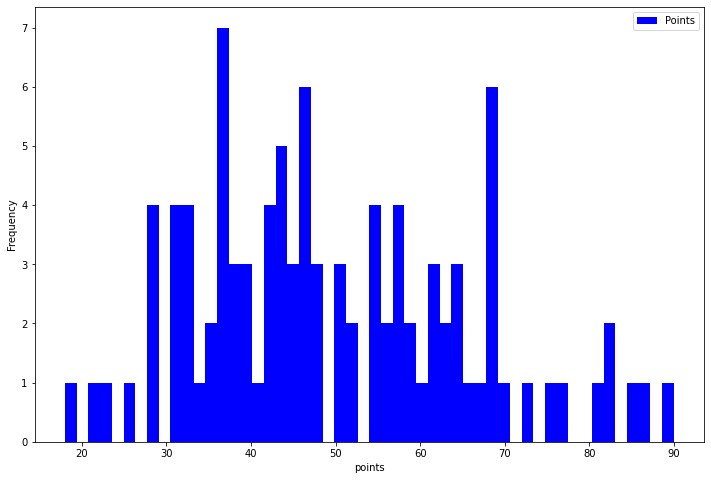

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64
[90 86 85 77 83 81 76 69 73 70 64 68 66 67 65 62 58 63 57 61 59 60 55 52
 56 54 51 50 46 48 45 47 42 44 43 38 41 40 39 37 36 33 35 34 32 31 28 29
 26 23 22 18]


In [96]:
plt.figure(figsize=(12,8))
plt.hist(pts, bins=52, color='blue', label='Points')

# add labels and legend
plt.xlabel('points')
plt.ylabel('Frequency')
plt.legend()
#
# show plot
plt.show()

print(pts.describe())
print(pts.unique())


#- Exercise 2

With the same dataset select two other attributes from the dataset. Calculate the p-values ​​and say whether they reject the null hypothesis by taking an alpha of 5%.

In [97]:
# Get the 'golas by team to scorer' attribute from the dataframe
df['goals']= df['Top Team Scorer'].str.extract('(\d+)').astype(int)

top_scorer_goals = df['goals']
print(top_scorer_goals.describe())
print(top_scorer_goals.unique())

# Perform the Shapiro-Wilk test
stat_top_scorer_goals, p_top_scorer_goals = shapiro(top_scorer_goals)

# Get the 'L' attribute from the dataframe
att = df['Attendance']
print(att.describe())

# Perform the Shapiro-Wilk test
stat_att, p_att = shapiro(att)

alpha = 0.05

if p_top_scorer_goals < alpha:
    print("Number of goals by top scorer does not come from a normal distribution (p-value = {:.3f})".format(p_top_scorer_goals))
else:
    print("Number of goals by top scorer comes from a normal distribution (p-value = {:.3f})".format(p_top_scorer_goals))

if p_att < alpha:
    print("Attendance does not come from a normal distribution (p-value = {:.3f})".format(p_att))
else:
    print("Attendance comes from a normal distribution (p-value = {:.3f})".format(p_att))

count    98.000000
mean     12.591837
std       5.514436
min       5.000000
25%       9.000000
50%      11.000000
75%      15.000000
max      35.000000
Name: goals, dtype: float64
[15 22 27 35 25 11 21 14 12 10 24  9 16 20 13 17 18  8  6  7  5]
count       98.000000
mean     24239.857143
std      14874.171842
min       5870.000000
25%      12355.500000
50%      20491.000000
75%      32382.000000
max      73150.000000
Name: Attendance, dtype: float64
Number of goals by top scorer does not come from a normal distribution (p-value = 0.000)
Attendance does not come from a normal distribution (p-value = 0.000)


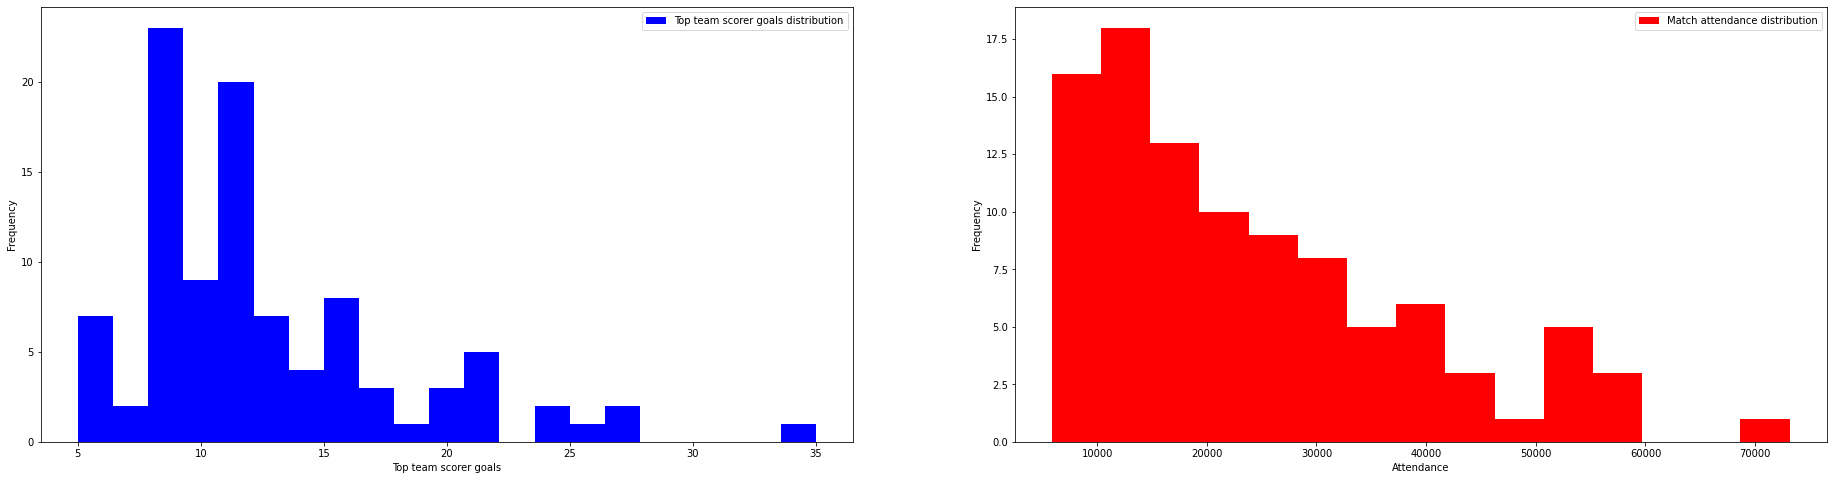

In [98]:
#show distribution plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(32,8))

axs[0].hist(top_scorer_goals, bins=21, color='blue', label='Top team scorer goals distribution')
# add labels and legend
axs[0].set_xlabel('Top team scorer goals')
axs[0].set_ylabel('Frequency')
axs[0].legend()

axs[1].hist(att, color='red', bins=15, label='Match attendance distribution')
# add labels and legend
axs[1].set_xlabel('Attendance')
axs[1].set_ylabel('Frequency')
axs[1].legend()


# show plot
plt.show()

#- Exercise 3

Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.
In this case the 3 attributes will be the number of matches won, drawn and lost and again their distribution will be analyzed.

In [99]:

# Get the 'W' attribute from the dataframe
won = df['W']
print(won.describe())
print(won.unique())

# Perform the Shapiro-Wilk test
stat_won, p_won = shapiro(won)

# Get the 'L' attribute from the dataframe
drawn = df['D']
print(drawn.describe())
print(drawn.unique())

# Perform the Shapiro-Wilk test
stat_drawn, p_drawn = shapiro(drawn)

# Get the 'L' attribute from the dataframe
lost = df['L']
print(lost.describe())
print(lost.unique())

# Perform the Shapiro-Wilk test
stat_lost, p_lost = shapiro(lost)

alpha = 0.05

if p_won < alpha:
    print("Number of matches won does not come from a normal distribution (p-value = {:.3f})".format(p_won))
else:
    print("Number of matches won comes from a normal distribution (p-value = {:.3f})".format(p_won))

if p_drawn < alpha:
    print("Number of matches drawn does not come from a normal distribution (p-value = {:.3f})".format(p_drawn))
else:
    print("Number of matches drawn comes from a normal distribution (p-value = {:.3f})".format(p_drawn))

if p_lost < alpha:
    print("Number of matches lost does not come from a normal distribution (p-value = {:.3f})".format(p_lost))
else:
    print("Number of matches lost comes from a normal distribution (p-value = {:.3f})".format(p_lost))


count    98.000000
mean     13.448980
std       5.747474
min       3.000000
25%       9.000000
50%      13.000000
75%      17.000000
max      28.000000
Name: W, dtype: float64
[28 26 24 25 23 22 21 20 19 17 18 16 15 14 13 12 11 10  9  8  7  6  5  4
  3]
count    98.000000
mean      9.408163
std       2.903381
min       3.000000
25%       7.000000
50%       9.000000
75%      11.000000
max      16.000000
Name: D, dtype: float64
[ 6  8  7  5  9  3 10 16 12 11 13 15 14]
count    98.00000
mean     13.44898
std       5.12347
min       2.00000
25%      10.00000
50%      13.00000
75%      17.00000
max      26.00000
Name: L, dtype: float64
[ 3  2  4  5  7  9  6  8 11 12 10 13 16 14 15 17 18 20 21 19 22 23 26 25]
Number of matches won does not come from a normal distribution (p-value = 0.011)
Number of matches drawn comes from a normal distribution (p-value = 0.081)
Number of matches lost comes from a normal distribution (p-value = 0.558)


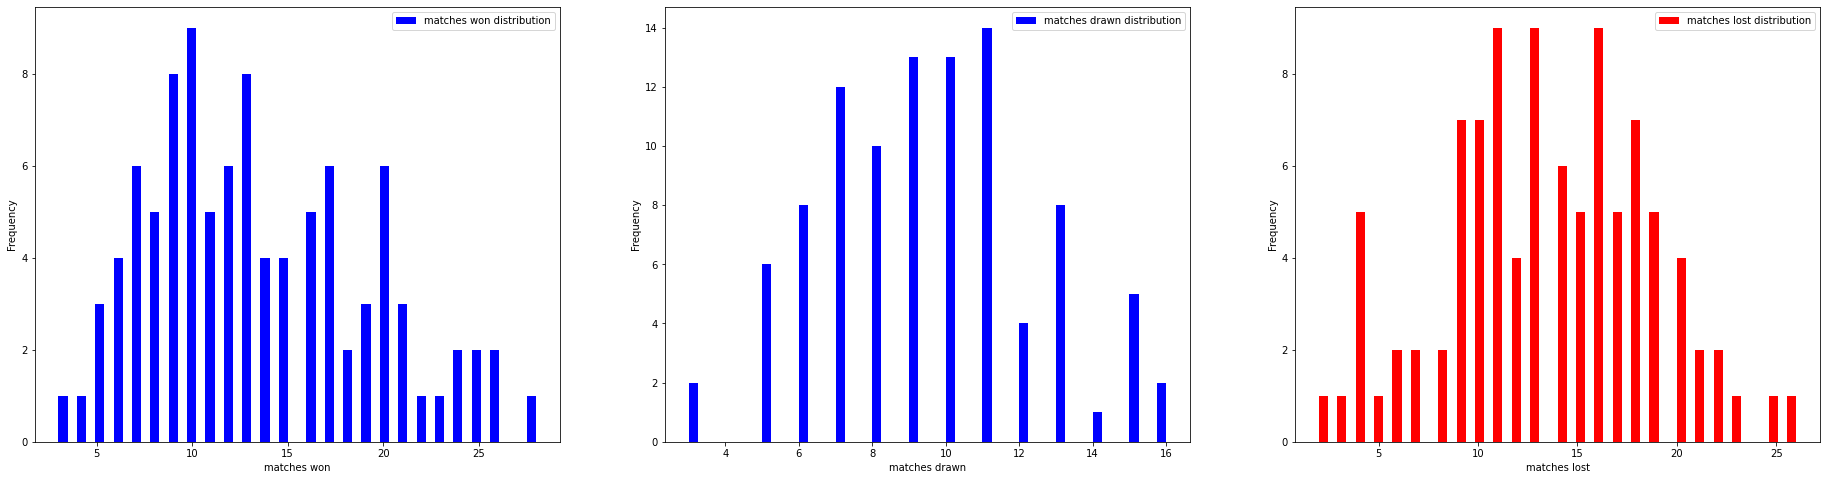

In [72]:
#show distribution plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(32,8))

axs[0].hist(won, bins=52, color='blue', label='matches won distribution')
# add labels and legend
axs[0].set_xlabel('matches won')
axs[0].set_ylabel('Frequency')
axs[0].legend()

axs[1].hist(drawn, bins=52, color='blue', label='matches drawn distribution')
# add labels and legend
axs[1].set_xlabel('matches drawn')
axs[1].set_ylabel('Frequency')
axs[1].legend()

axs[2].hist(lost, bins=52, color='red', label='matches lost distribution')
# add labels and legend
axs[2].set_xlabel('matches lost')
axs[2].set_ylabel('Frequency')
axs[2].legend()

# show plot
plt.show()
